# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv')

In [3]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
raw_data = raw_data.drop(labels='Unnamed: 0',axis=1)
data = raw_data.copy()
data['y'] = data['y'].map({'yes':1,'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [7]:
x1_1 = sm.add_constant(x1)
reg1 = sm.Logit(y,x1_1).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [8]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                  0.2121
Time:                        21:17:33   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

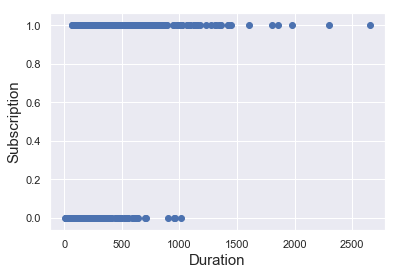

In [9]:
plt.scatter(x1,y)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Subscription', fontsize=15)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [10]:
x2 = data.drop(labels=['y','may'], axis=1)
x2.head()

,interest_rate,credit,march,previous,duration
0,1.334,0.0,1.0,0.0,117.0
1,0.767,0.0,0.0,1.0,274.0
2,4.858,0.0,1.0,0.0,167.0
3,4.120,0.0,0.0,0.0,686.0
4,4.856,0.0,1.0,0.0,157.0


### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [11]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [12]:
x2_1 = sm.add_constant(x2)
reg2 = sm.Logit(y,x2_1).fit()
cm, accuracy = confusion_matrix(x2_1, y, reg2)

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [13]:
cm

array([[218.,  41.],
       [ 30., 229.]])

In [14]:
accuracy

0.862934362934363

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [15]:
test = pd.read_csv('Bank-data-testing.csv')

In [16]:
test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


### Declare the dependent and the independent variables

In [18]:
test_modified = test.drop(labels=['Unnamed: 0', 'may'], axis=1)

In [20]:
y_test = test_modified['y'].map({'yes':1,'no':0})
x_test = test_modified.drop(labels='y', axis=1)

In [22]:
x_test.head()

,interest_rate,credit,march,previous,duration
0,1.313,0.0,1.0,0.0,487.0
1,4.961,0.0,0.0,0.0,132.0
2,4.856,0.0,1.0,0.0,92.0
3,4.120,0.0,0.0,0.0,1468.0
4,4.963,0.0,0.0,0.0,36.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [23]:
x_test_1 = sm.add_constant(x_test)
cm_test, accuracy_test = confusion_matrix(x_test_1, y_test, reg2)

In [24]:
cm_test

array([[93., 18.],
       [13., 98.]])

In [25]:
accuracy_test

0.8603603603603603